In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow import keras

In [2]:
df = pd.read_csv('five_dataset.csv')
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [4]:
def prob(num):
    model_path = 'five.keras'
    x = df['x'].values.reshape(-1,1)
    y = df['y'].values.reshape(-1,1)
    xn = x.min()
    yn = y.min()
    xx = x.max()
    yx = y.max()
    x = (x-xn)/(xx-xn)
    y = (y-yn)/(yx-yn)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(1,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = 'adam', loss='mean_squared_error')
        hist = model.fit(x,y, epochs=500)
        model.save('five.keras')
        lv = hist.history['loss']
        pred= model.predict(x)
        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.scatter(x, y, label='actual', color='blue')
        plt.plot(x,pred, label='predicted', color='pink')
        plt.grid(True)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()
    return model.predict(np.array([[(num-xn)/(xx-xn)]]))[0][0]*(yx-yn)+yn


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3103
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1654 
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0806 
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0089
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 
Epoch 13/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 
Epoch 14/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 
Epoch 15/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss

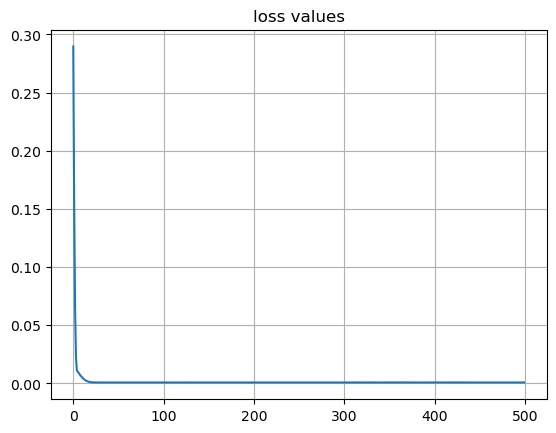

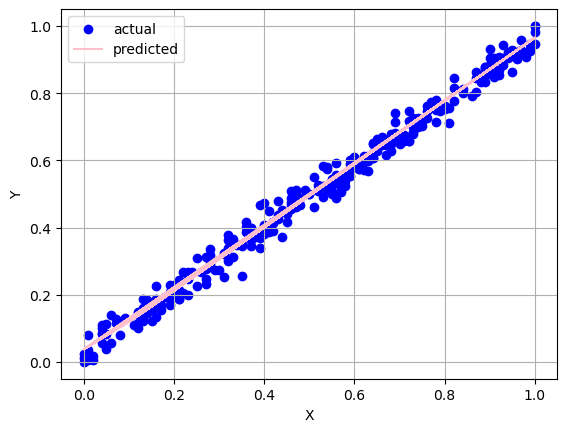

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
101.75764166877413
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
0.6229569382688762
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
50.822896218445074


In [5]:
print(prob(100))
print(prob(0))
print(prob(50))